# Assignment no 2 WIDS 2025  
## Utkarsh Gangwar  RollNo: 24B2197

Answer to sub problems are commented in cells answering to the respective coding part of that sub problem.

In [1]:
import pandas as pd
df=pd.read_csv("housing.csv")
print("shape of dataset is:")
print(df.shape)
print("name of columns:")
print(df.columns)
print("first ten rows")
print(df.head(10))
print("Describing data:")
print(df.describe())
print("Data info")
df.info()
# Answer
#Highest variance is in Median House Values followed by Total Rooms 
#and then in Population (similar to their order of standard deviaiton)


shape of dataset is:
(20640, 10)
name of columns:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
first ten rows
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2

## Univariate Analysis (Histograms)

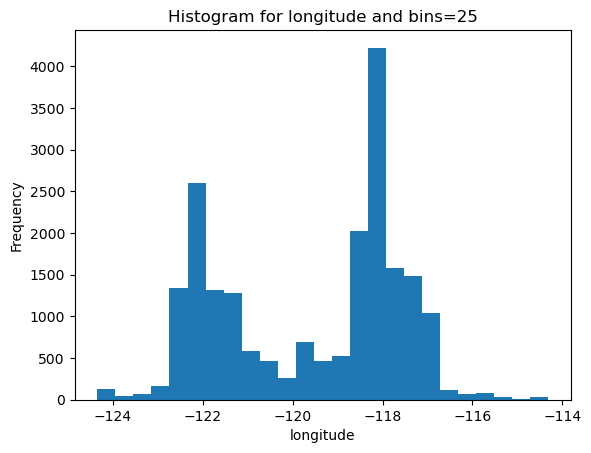

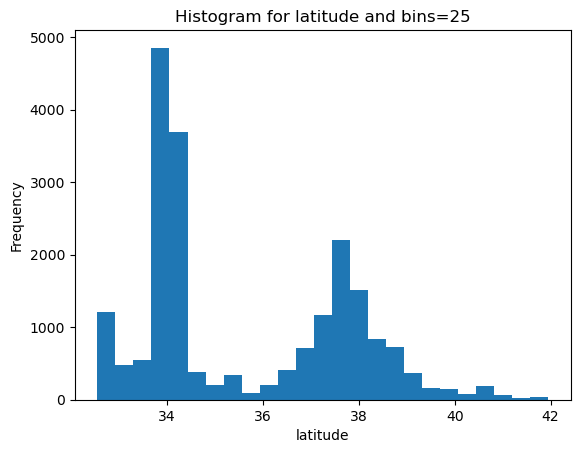

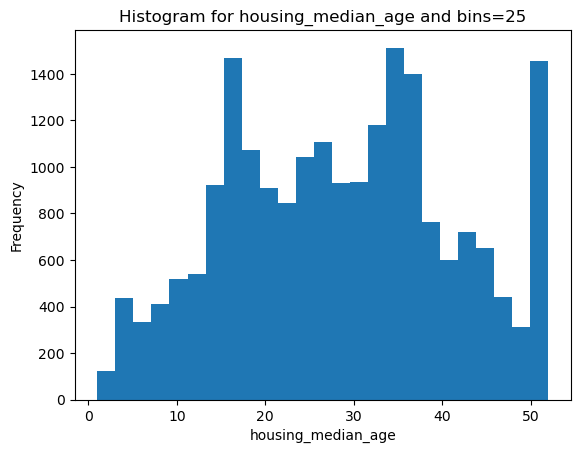

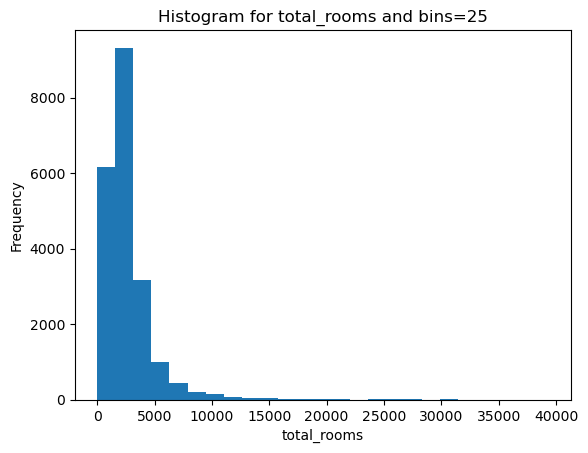

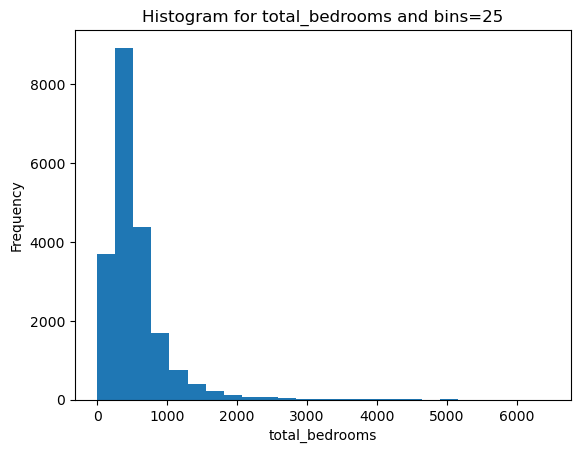

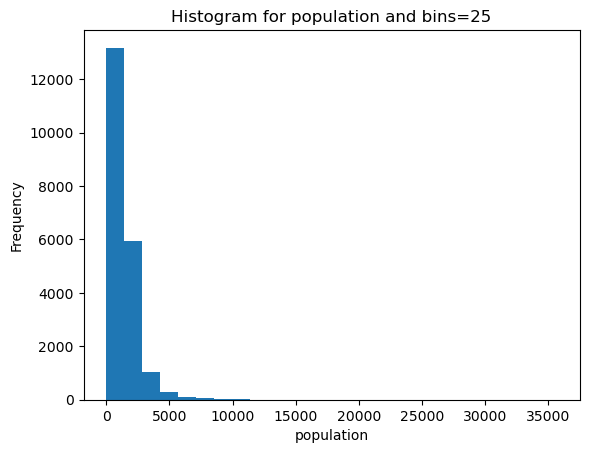

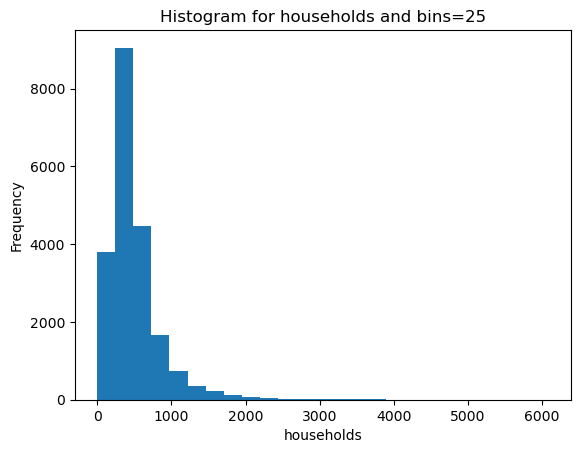

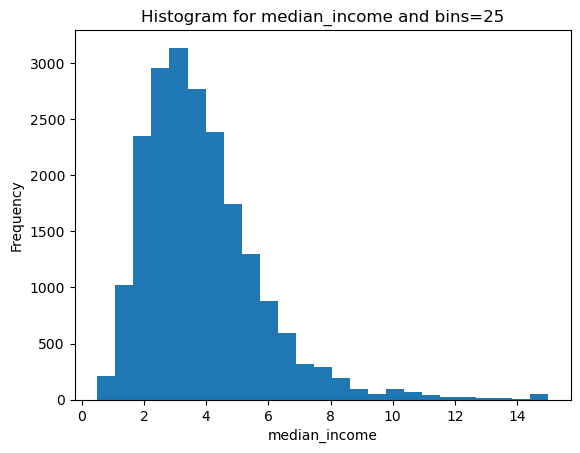

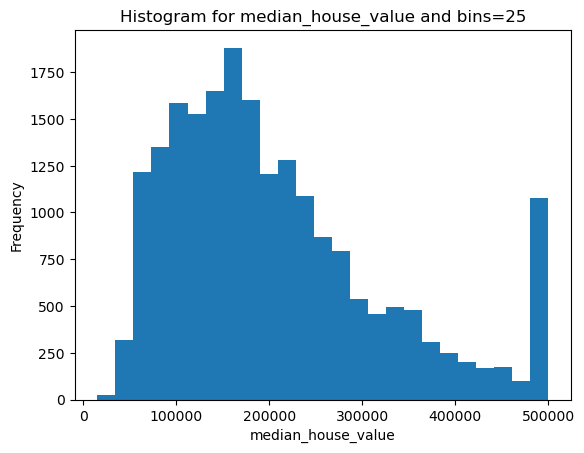

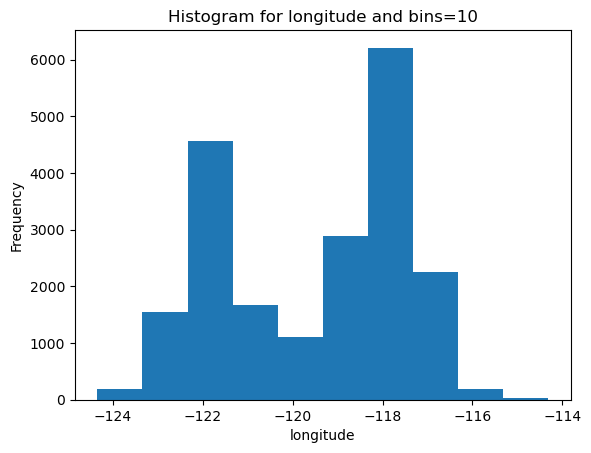

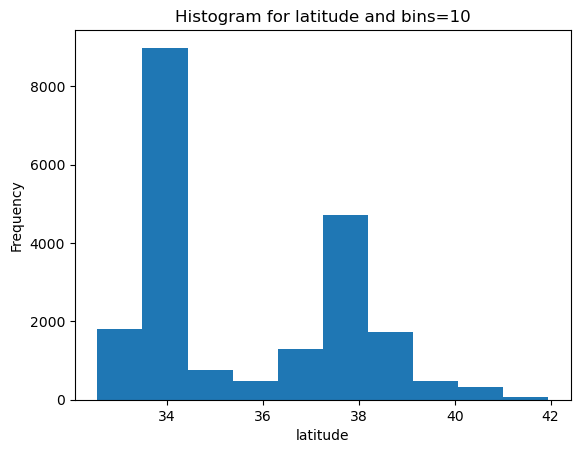

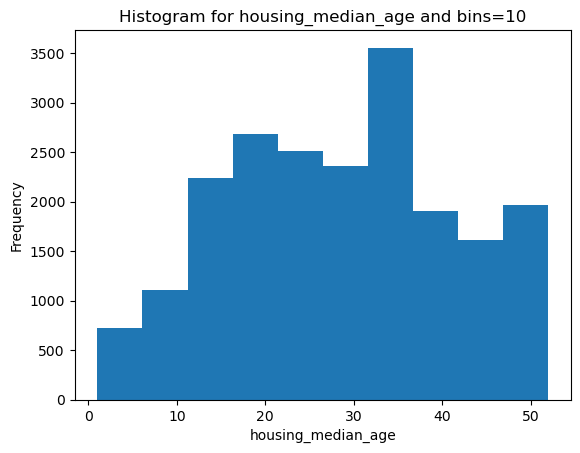

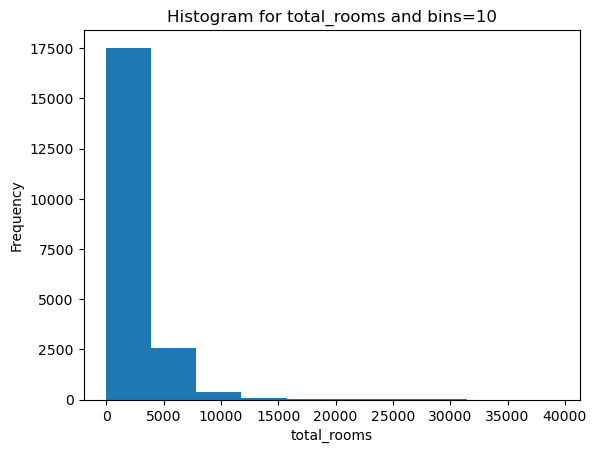

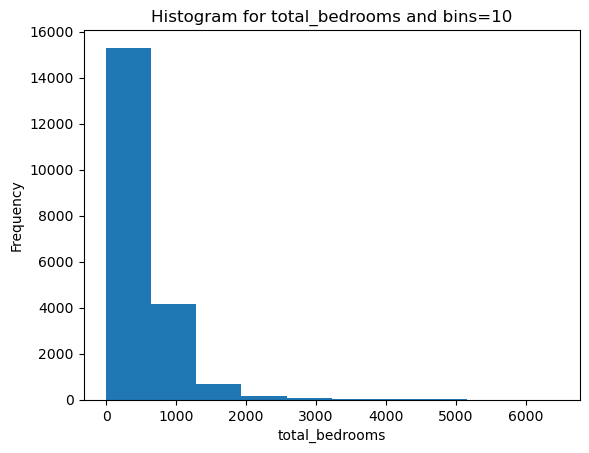

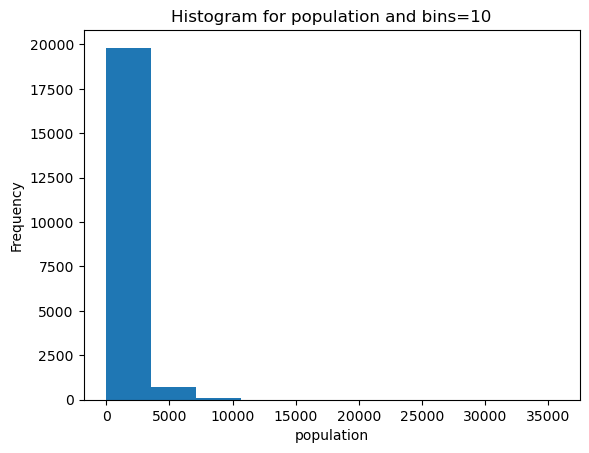

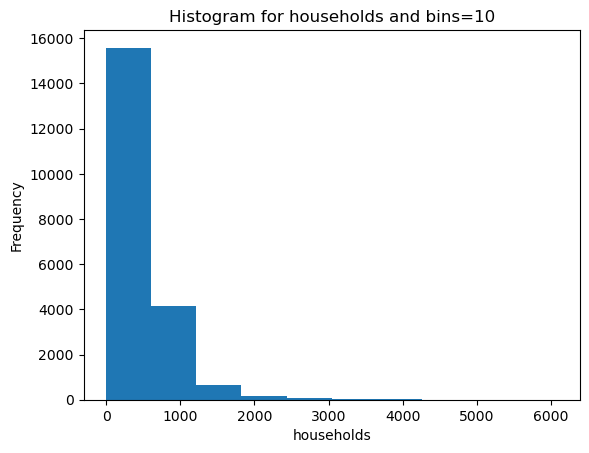

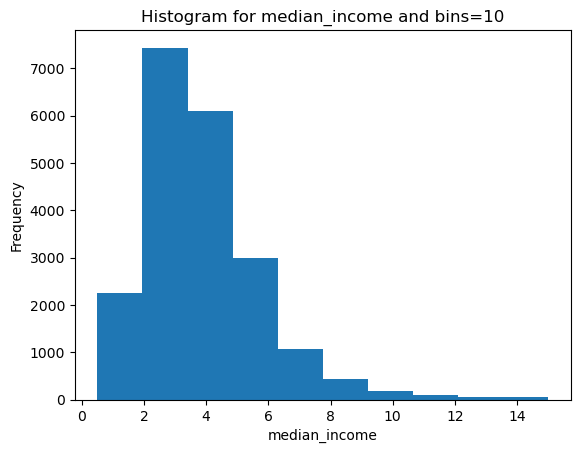

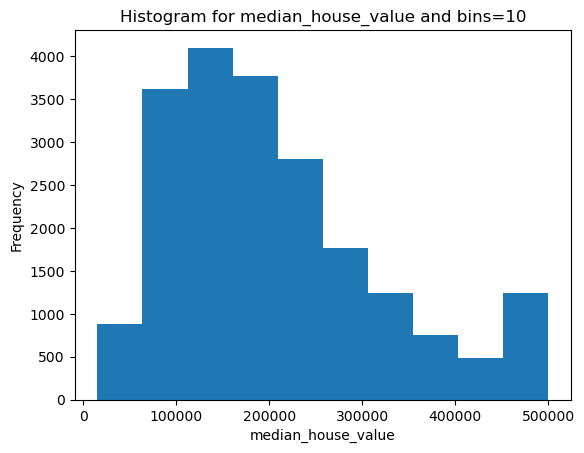

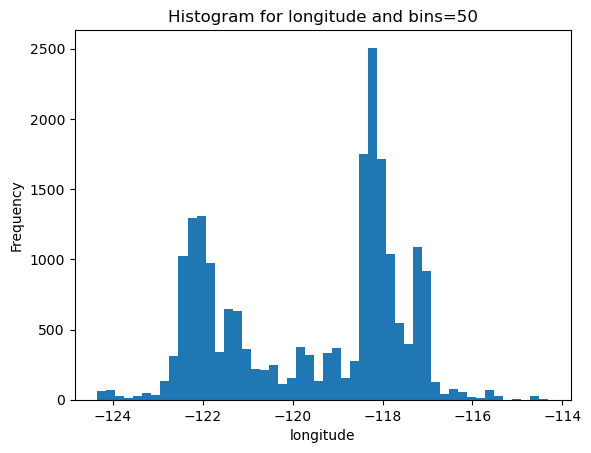

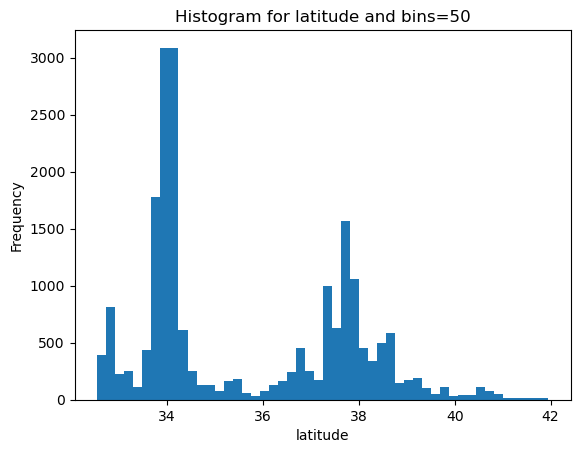

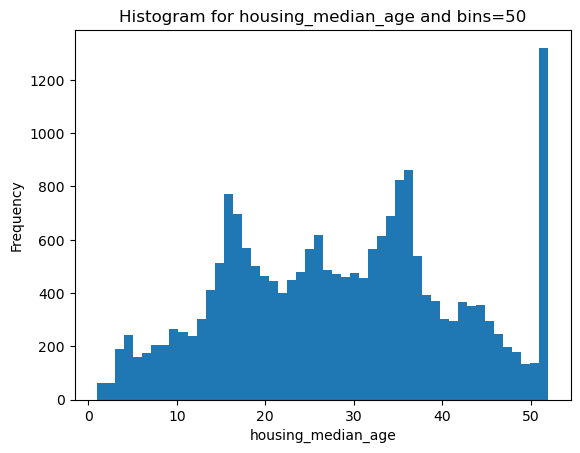

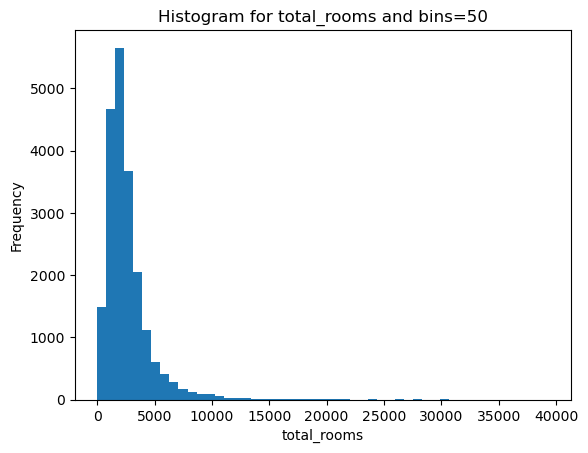

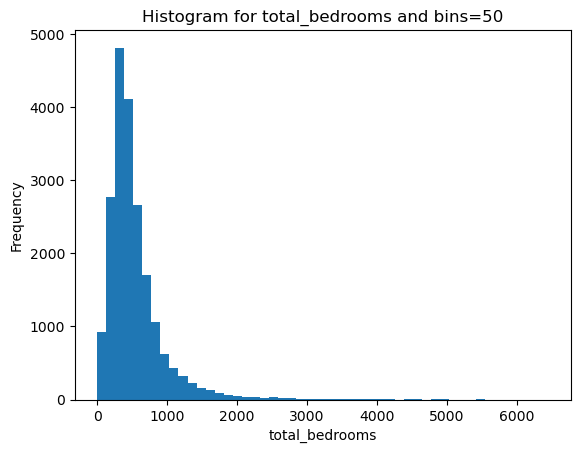

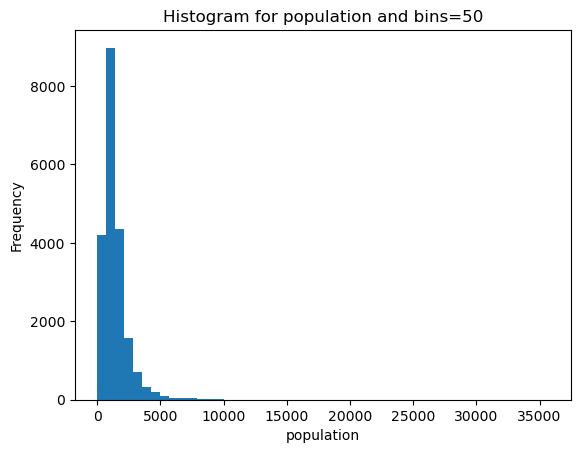

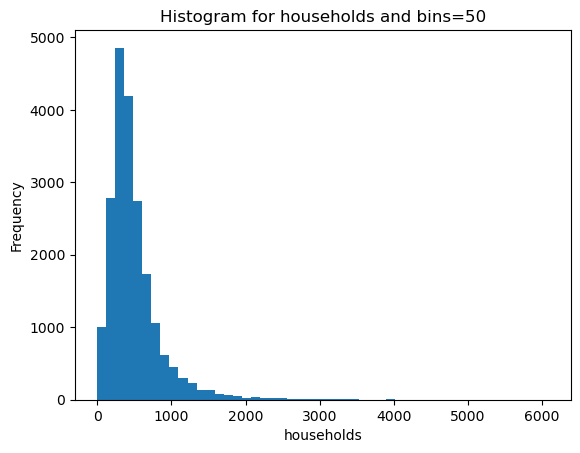

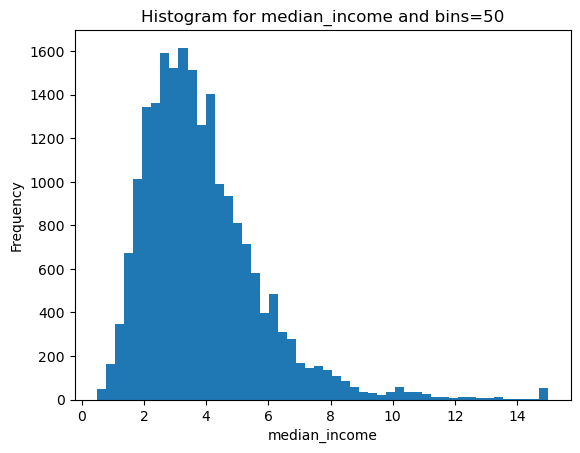

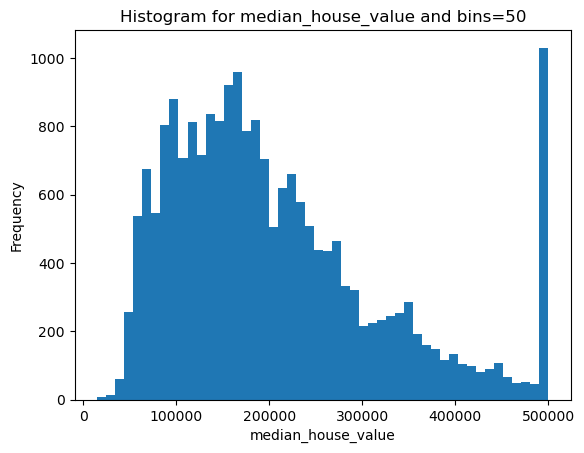

In [2]:
import matplotlib.pyplot as plt
dff=df.drop(columns=["ocean_proximity"])
for col in dff.columns:
    plt.figure()
    plt.hist(dff[col],bins=25)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {col} and bins=25")
    plt.show()
for col in dff.columns:
    plt.figure()
    plt.hist(dff[col],bins=10)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {col} and bins=10")
    plt.show()
for col in dff.columns:
    plt.figure()
    plt.hist(dff[col],bins=50)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {col} and bins=50")
    plt.show()

#Comment
#Log transformation is preferrably used when data is right skewed.
# Winsorization limits extreme values to some limiting value (reduces impact of outliers).
#Square root transformation reduces moderate skewness.


# here using 25 bins is a good choice as it is balanced in information it has and how much can it convey

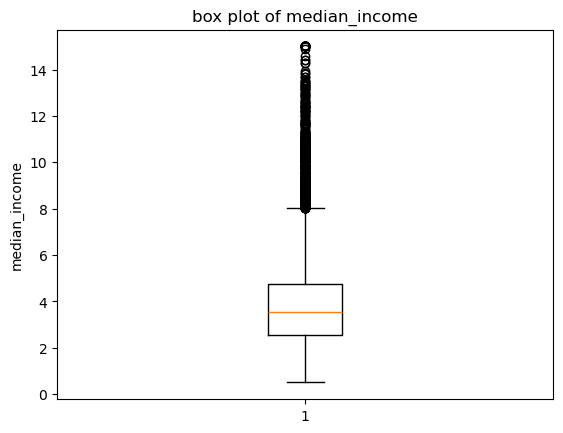

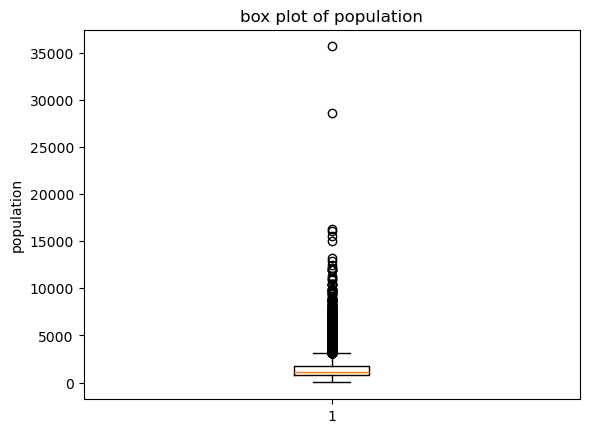

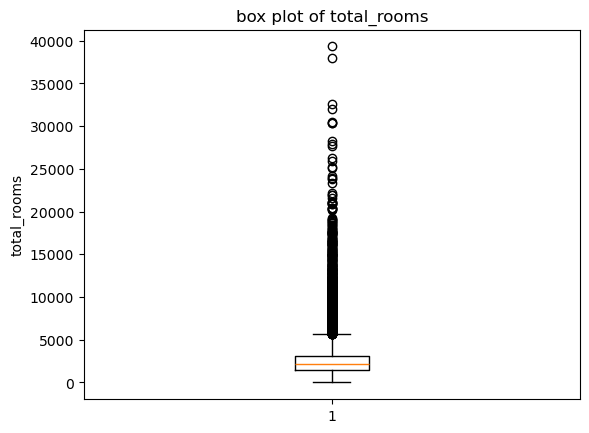

In [3]:
# Box PLots
features1=["median_income","population","total_rooms"]
for col in features1:
    plt.figure()
    plt.boxplot(df[col])
    plt.ylabel(col)
    plt.title(f"box plot of {col}")
    plt.show()
# Median income has fewer outliers 
#Population has high value outliers
#total rooms has several outliers 


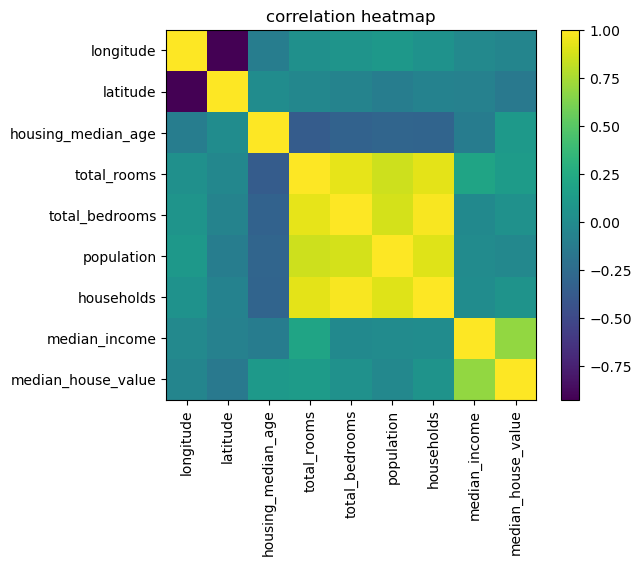

In [4]:
corr=dff.corr()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)),corr.columns,rotation=90)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.title("correlation heatmap")
plt.show()
#median income has the strongest positive correlation with median house value
# making it the most important predictor


## Latitude/Longitude Visualization


Text(0.5, 1.0, 'Distribution of California housing prices')

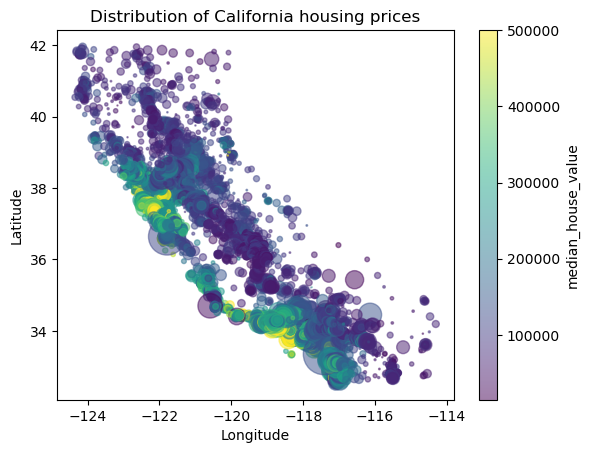

In [5]:
plt.figure()
plt.scatter(df["longitude"],df["latitude"],c=df["median_house_value"],s=df["population"]/40,cmap="viridis",alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label='median_house_value')
plt.title("Distribution of California housing prices")

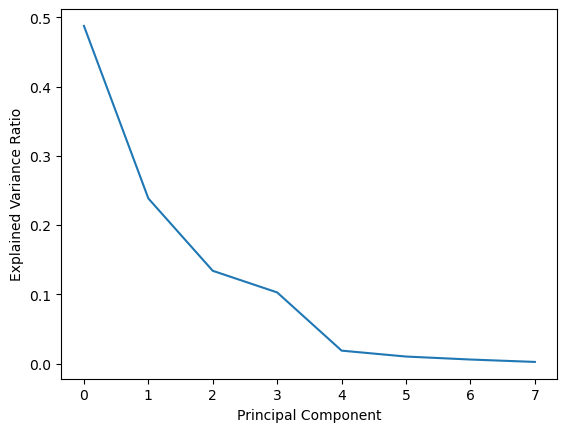

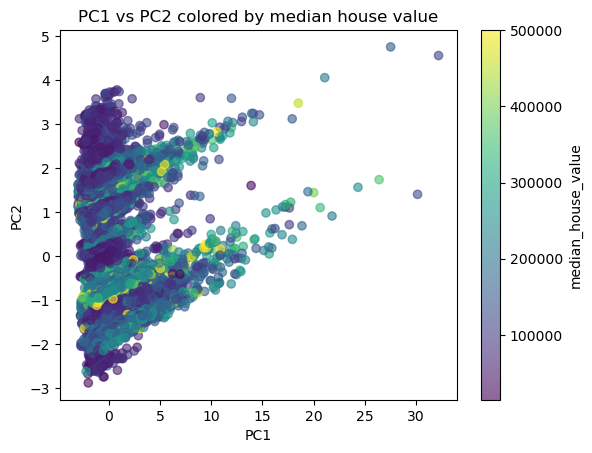

In [6]:
# Answer to  Explain why scaling is required before PCA.
# Scaling is required before PCA because PCA is variance based, and features with large numeric ranges 
# will otherwise dominate the principal components.
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
X=dff.drop("median_house_value",axis=1)
pipeline=Pipeline([("imputer",SimpleImputer(strategy="mean")),("scaler",StandardScaler()),("pca",PCA())])
y=df["median_house_value"]
X_pca=pipeline.fit_transform(X)
pca=pipeline.named_steps["pca"]

plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()
x_pca_2=X_pca[:,:2]
plt.figure()
plt.scatter(x_pca_2[:,0],x_pca_2[:,1],c=y,cmap="viridis",alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 vs PC2 colored by median house value")
plt.colorbar(label="median_house_value")
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

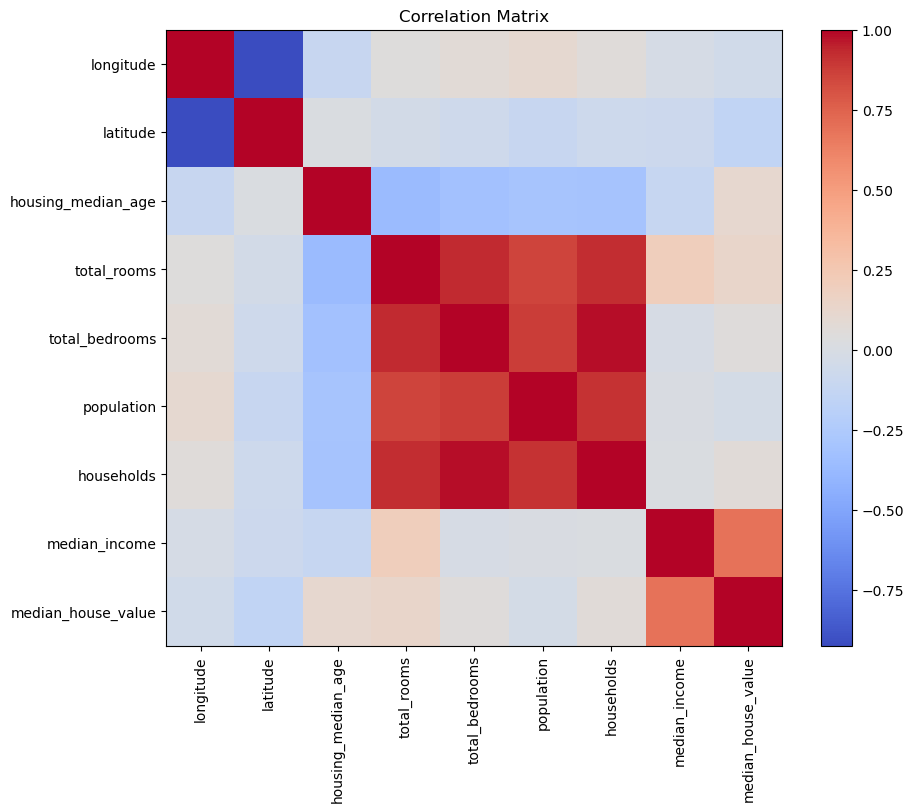

In [7]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
plt.imshow(corr,cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(corr.columns)),corr.columns,rotation=90)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.title("Correlation Matrix")

# Clearly from given Correlation Matrix representation
# it can be seen that correlation matrix value of latitude and longitude with median house value is
# very less which implies that there is negligible llinear relationship between them and as they
# represents a spatial location and not any economic factor they are excluded in order to avoid
# any misleading linear interpretation


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df.drop(columns=["median_house_value","ocean_proximity","latitude","longitude"])
y=df["median_house_value"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
pipeline=Pipeline([("imputer",SimpleImputer(strategy="mean")),("scaler",StandardScaler()),("regressor",LinearRegression())])
pipeline.fit(X_train,y_train)
coefficients=pipeline.named_steps["regressor"].coef_
intercept=pipeline.named_steps["regressor"].intercept_
coef_df=pd.DataFrame({
    "Feature":X.columns,
    "Coefficient":coefficients
})
print("Coefficients:")
print(coef_df)
print("\nIntercept:")
print(intercept)

Coefficients:
              Feature   Coefficient
0  housing_median_age  23906.195203
1         total_rooms -43497.748845
2      total_bedrooms  42713.178828
3          population -40536.871604
4          households  48392.878111
5       median_income  91325.092200

Intercept:
207194.6937378876


In [9]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Mean square error
5963980553.116094
Mean absolute error
56740.359421349705


Text(0, 0.5, 'Predicted Median House Value')

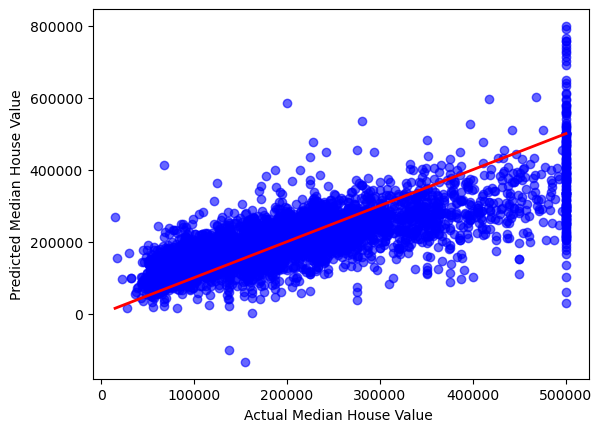

In [10]:
y_pred=pipeline.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred) # r2 score
n=X_test.shape[0]
p=X_test.shape[1]
adjr2=1-(1-r2)*(n-1)/(n-p-1) #adjusted r2 score
#high r square score is not good always as it might be the indication of overfitting leading to model 
# performing well on training data and poorly on unseen data

# low training loss again means that data has been overfitted and high loss on test set
# but we want a balance loss on training and test set to ensure generalisation
print("Mean square error")
print(mse)
print("Mean absolute error")
print(mae)
plt.scatter(y_test,y_pred,alpha=0.6,color='blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red',linewidth=2)
plt.xlabel("Actual Median House Value ")
plt.ylabel("Predicted Median House Value")

Text(0.5, 1.0, 'Predicted value vs Residual value')

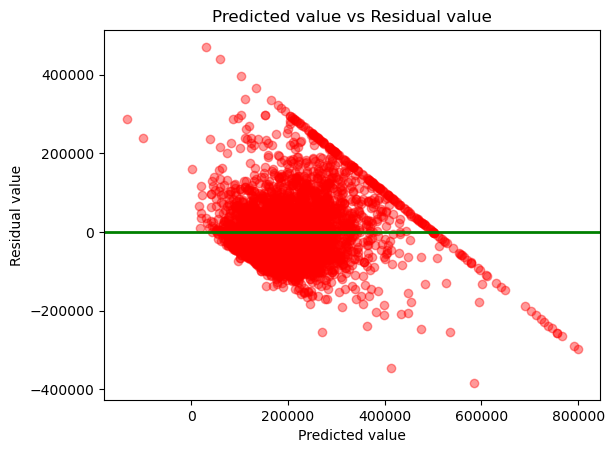

In [11]:
residuals=y_test-y_pred
plt.scatter(y_pred,residuals,alpha=0.4,color="red")
plt.axhline(0,color='green',linewidth=2)
plt.xlabel("Predicted value")
plt.ylabel("Residual value")
plt.title("Predicted value vs Residual value")